<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-08 16:08:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  38.1MB/s    in 0.9s    

2024-11-08 16:08:12 (38.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


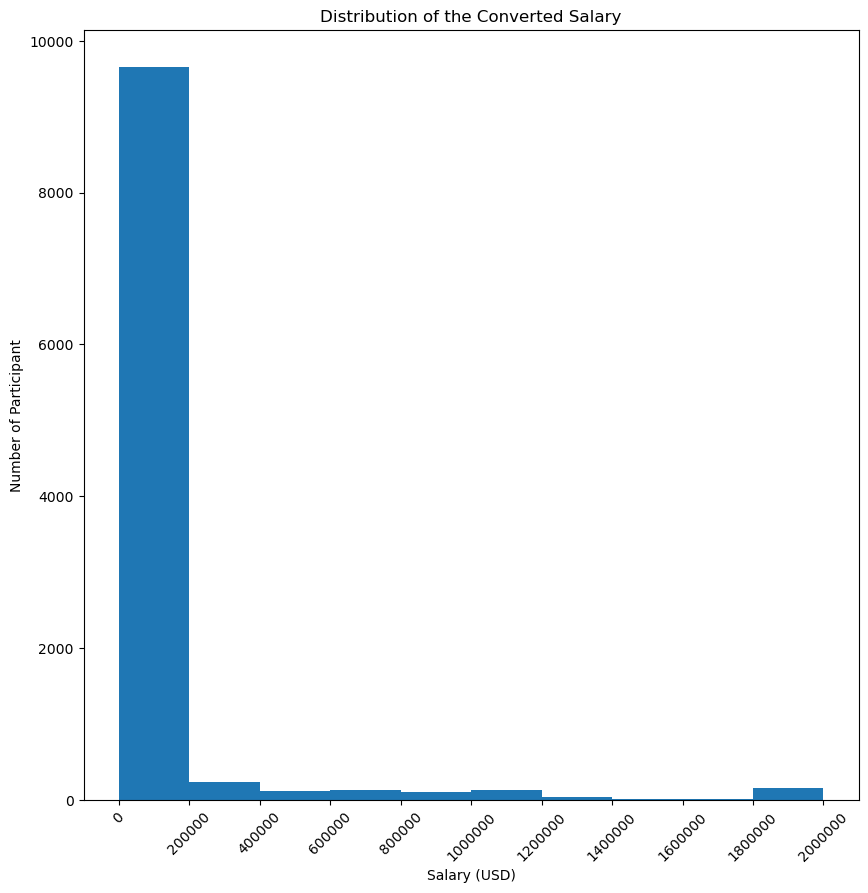

In [9]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,10))
n, bins, pathes = plt.hist(df, bins=10)

plt.title('Distribution of the Converted Salary')
plt.xlabel('Salary (USD)')
plt.ylabel('Number of Participant')
plt.xticks(bins, rotation=45)  # Use the computed bins for alignment and rotate if needed
plt.ticklabel_format(style='plain')

plt.show()

### Box Plots


Plot a box plot of `Age.`


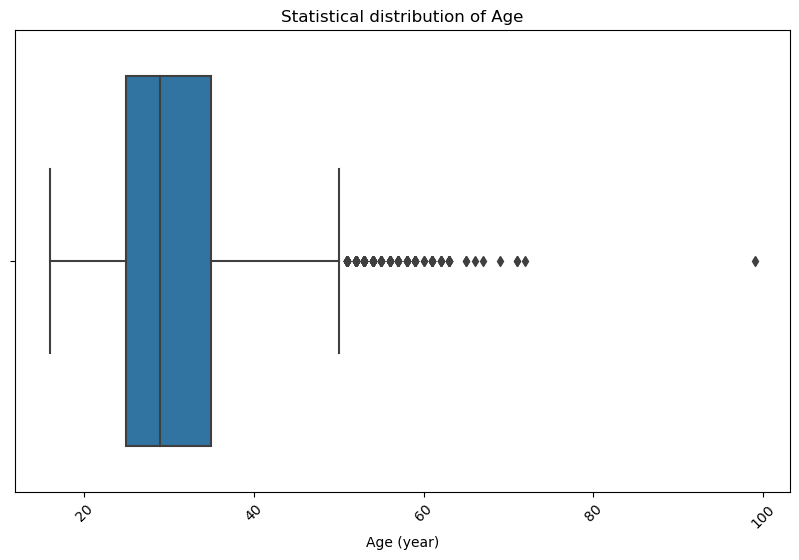

In [12]:
# your code goes here

QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,6))
ax = sns.boxplot(df)
plt.title('Statistical distribution of Age')
plt.xlabel('Age (year)')
#plt.xticks(rotation=45)  # Use the computed `bins` for alignment and rotate if needed
plt.ticklabel_format(style='plain', axis='x')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


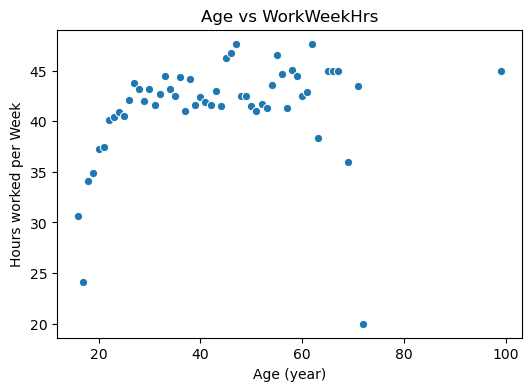

In [35]:
# your code goes here
Query = """
SELECT Age, AVG(WorkWeekHrs) AS WorkWeekHrs
FROM master
GROUP BY Age
"""
df = pd.read_sql_query(Query,conn)

plt.figure(figsize=(6,4))
ax = sns.scatterplot(data=df, x='Age', y='WorkWeekHrs')

plt.title('Age vs Hours worked per week')
plt.xlabel('Age (year)')
plt.ylabel('Hours worked per Week')
#plt.xticks(rotation=45)  # Use the computed `bins` for alignment and rotate if needed
plt.ticklabel_format(style='plain')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


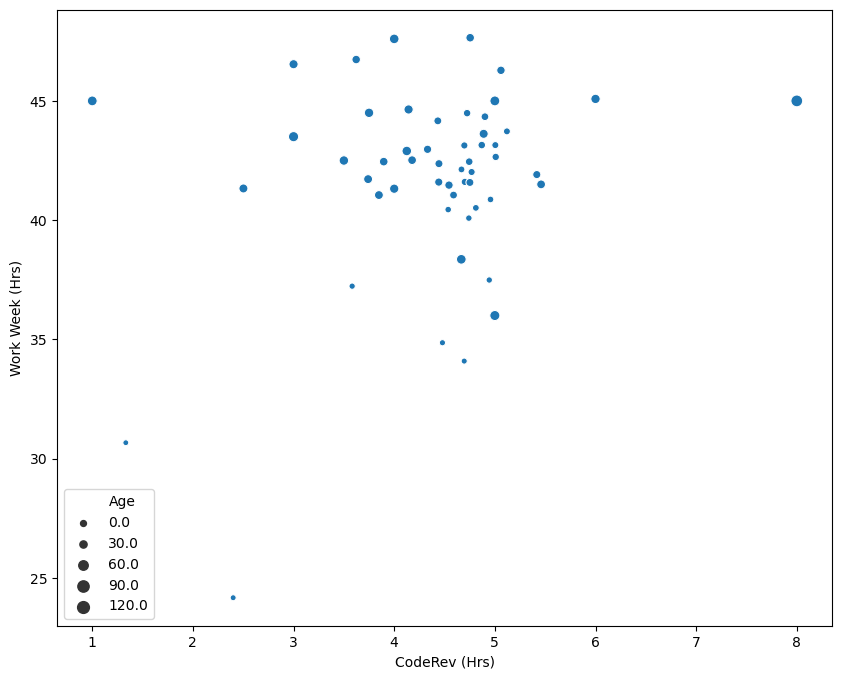

In [41]:
# your code goes here
Query = """
SELECT AVG(WorkWeekHrs) AS WorkWeekHrs, AVG(CodeRevHrs) AS CodeRevHrs, Age
FROM master
GROUP BY Age
"""

df = pd.read_sql_query(Query, conn)

plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=df, x='CodeRevHrs', y='WorkWeekHrs', size="Age")

plt.xlabel('CodeRev (Hrs)')
plt.ylabel('Work Week (Hrs)')
#plt.xticks(rotation=45)  # Use the computed `bins` for alignment and rotate if needed
plt.ticklabel_format(style='plain')

plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


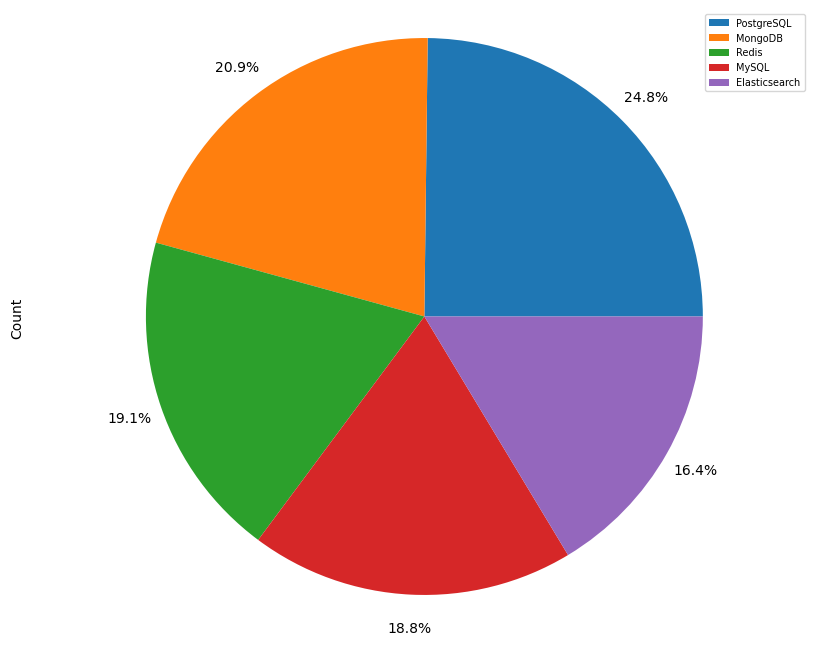

In [74]:
# your code goes here
Query = """
SELECT  COUNT(DatabaseDesireNextYear) as Count , DatabaseDesireNextYear
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(DatabaseDesireNextYear) DESC
LIMIT 5
"""

df = pd.read_sql_query(Query, conn)

df.plot(kind='pie',y='Count', autopct='%1.1f%%', pctdistance = 1.12, labels = None, figsize=(10,8) )
plt.axis('equal')
plt.legend(labels = df['DatabaseDesireNextYear'], loc='upper right', fontsize = 7)
plt.show()

In [4]:
# Question 2 - In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
Query = """
SELECT  COUNT(LanguageDesireNextYear) as Count , LanguageDesireNextYear
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY COUNT(LanguageDesireNextYear) DESC
"""

df = pd.read_sql_query(Query, conn)
df

,Count,LanguageDesireNextYear
0,6630,JavaScript
1,5328,HTML/CSS
2,5239,Python
3,5012,SQL
4,4088,TypeScript
5,3591,C#
6,3097,Bash/Shell/PowerShell
7,2953,Java
8,2759,Go
9,1890,Kotlin


In [83]:
# Question 3 - How many respondents indicated that they currently work with 'SQL'?
Query = """
SELECT  COUNT(LanguageWorkedWith) as Count , LanguageWorkedWith
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
HAVING LanguageWorkedWith == 'SQL'
"""

df = pd.read_sql_query(Query, conn)
df

,Count,LanguageWorkedWith
0,7106,SQL


In [35]:
# Question 4 - How many respondents indicated that they work on 'MySQL' only? 
Query = """
SELECT COUNT(DISTINCT Respondent) AS MySQL_only_count,  DatabaseWorkedWith
FROM DatabaseWorkedWith
WHERE Respondent NOT IN (
    SELECT Respondent
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith <> 'MySQL'
)
AND DatabaseWorkedWith = 'MySQL';

"""

df = pd.read_sql_query(Query, conn)
df



,MySQL_only_count,DatabaseWorkedWith
0,474,MySQL


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0, 0.5, 'Times (hrs)')

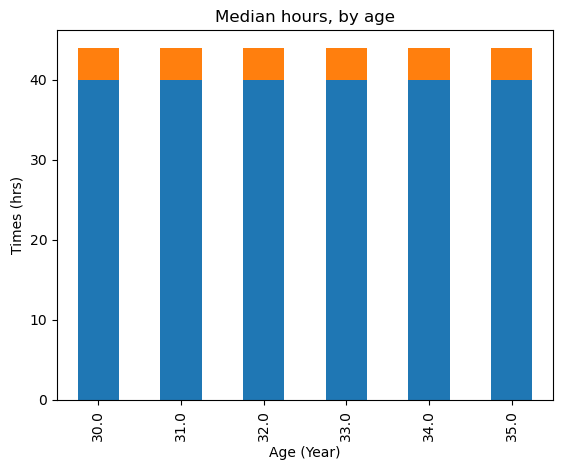

In [26]:
# your code goes here
Query = """ 
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master 
WHERE Age BETWEEN 30 AND 35 
""" 
df = pd.read_sql_query(Query, conn)

#df.groupby('Age')[order].median().plot.bar(stacked=True)
#plt.title('Median hours, by age')

order = ['WorkWeekHrs', 'CodeRevHrs']
df_stacked = df.groupby('Age')[order].median()
df_stacked.plot(kind='bar', stacked=True, legend=None)

plt.title('Median hours, by age')
plt.xlabel('Age (Year)')
plt.ylabel('Times (hrs)')


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0, 0.5, 'Salary (USD)')

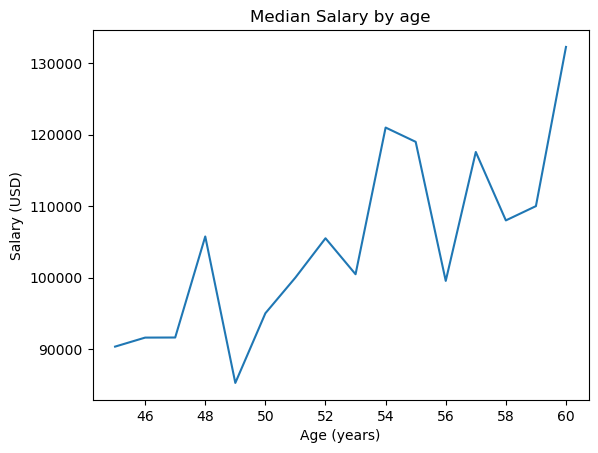

In [41]:
# your code goes here
Query = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(Query, conn)
df.groupby('Age')['ConvertedComp'].median().plot.line(x='Age', y='ConvertedComp')
plt.title('Median Salary by age')
plt.xlabel('Age (years)')
plt.ylabel('Salary (USD)')

Text(0, 0.5, 'Salary (USD)')

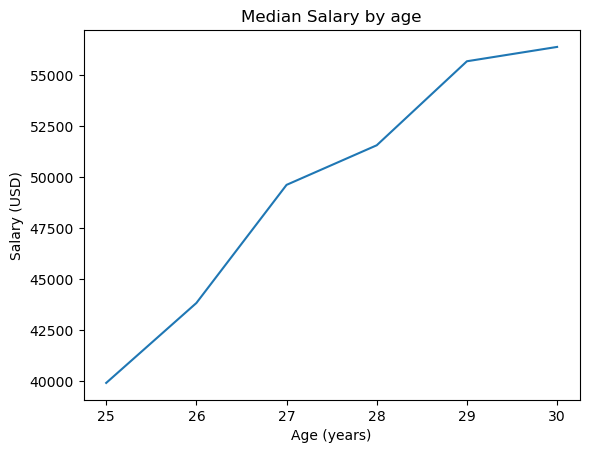

In [40]:
# Question 2 - Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, 
# what kind of correlation do you see between Age and median ConvertedComp? 
Query = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""

df = pd.read_sql_query(Query, conn)
df.groupby('Age')['ConvertedComp'].median().plot.line(x='Age', y='ConvertedComp')
plt.title('Median Salary by age')
plt.xlabel('Age (years)')
plt.ylabel('Salary (USD)')

In [10]:
#Question 1 Majority of the survey responders are

Query = """
SELECT COUNT(DevType), DevType
FROM DevType
GROUP BY DevType
ORDER BY COUNT(DevType) DESC
"""

df = pd.read_sql_query(Query, conn)


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


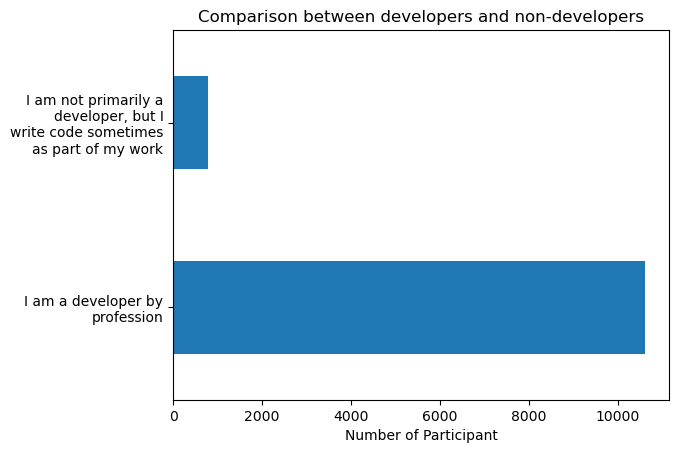

In [9]:
# your code goes here
Query = """
SELECT COUNT(MainBranch) AS Count, MainBranch
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(Query, conn)

df.set_index('MainBranch', inplace = True)
df.index.name = None
df.index = df.index.to_series().apply(lambda x: '\n'.join(textwrap.wrap(x, width=20)))  # Adjust width as needed

df.plot(kind='barh', legend = None)
plt.title('Comparison between developers and non-developers')
plt.xlabel('Number of Participant')
plt.show()


Close the database connection.


In [27]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
